# IMPORTS

In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Exercise 1

Translate the following sentences into propositional logic and verify that they can be processed with Expression.fromstring(). Provide a key which shows how the propositional variables in your translation correspond to expressions of English.

1. If Angus sings, it is not the case that Bertie sulks.
2. Cyril runs and barks.
3. It will snow if it doesn't rain.
4. It's not the case that Irene will be happy if Olive or Tofu comes.
5. Pat didn't cough or sneeze.
6. If you don't come if I call, I won't come if you call.

In [3]:
read_expr = nltk.Expression.fromstring

In [4]:
expr1 = read_expr("angus_sing -> -bertie_sulk")
expr2 = read_expr("cyril_run & cyril_bark")
expr3 = read_expr("-it_rain -> it_snow")
expr4 = read_expr("-((olive_come | tofu_come) -> irene_happy)")
expr5 = read_expr('-(pat_cough | pat_sneeze)')
expr6 = read_expr("-(I_call -> you_come) -> -(you_call -> I_come)")

# Exercise 2

Translate the following sentences into predicate-argument formula of first order logic.

1. Angus likes Cyril and Irene hates Cyril.
2. Tofu is taller than Bertie.
3. Bruce loves himself and Pat does too.
4. Cyril saw Bertie, but Angus didn't.
5. Cyril is a fourlegged friend.
6. Tofu and Olive are near each other.

In [5]:
read_expr = nltk.Expression.fromstring

In [6]:
expr1 = read_expr("like(angus, cyril) & hate(irene, cyril)")
expr2 = read_expr("taller(tofu, bertie)")
expr3 = read_expr("love(bruce, bruce) & love(pat, pat)")
expr4 = read_expr("see(cyril, bertie) & -see(angus, bertie)")
expr5 = read_expr("fourlegged(cyril) & friend(cyril)")
expr6 = read_expr("near(tofu, olive) & near(olive, tofu)")

# Exercise 3

Translate the following sentences into quantified formulas of first order logic.

1. Angus likes someone and someone likes Julia.
2. Angus loves a dog who loves him.
3. Nobody smiles at Pat.
4. Somebody coughs and sneezes.
5. Nobody coughed or sneezed.
6. Bruce loves somebody other than Bruce.
7. Nobody other than Matthew loves somebody Pat.
8. Cyril likes everyone except for Irene.
9. Exactly one person is asleep.

In [7]:
read_expr = nltk.Expression.fromstring

In [8]:
expr1 = read_expr("(exists x. (like(angus, x))) & (exist y. (like(y, julia)))")
expr2 = read_expr("exists x. (dog(x) & love(angus, x) & love(x, angus))")
expr3 = read_expr("-exists x. (smile(x, pat))")
expr4 = read_expr("exists x. (cough(x) & sneeze(x))")
expr5 = read_expr("-exists x. (cough(x) | sneeze(x))")
expr6 = read_expr("exists x. (love(bruce, x) & (bruce != x))")
expr7 = read_expr("all x. ((x != matthew) <-> -love(x, pat))")
expr8 = read_expr("all x. (like(cyril, x) <-> (x != irene))")
expr9 = read_expr("exists y. all x. (asleep(x) -> (x = y))")

# Exercise 4

Translate the following verb phrases using λ abstracts. quantified formulas of first order logic.

1. feed Cyril and give a capuccino to Angus
2. be given 'War and Peace' by Pat
3. be loved by everyone
4. be loved or detested by everyone
5. be loved by everyone and detested by no-one

In [9]:
read_expr = nltk.Expression.fromstring

In [10]:
expr1 = read_expr(r"\x. (feed(x, cyril) & give(x, capuccino, angus))")
expr2 = read_expr(r"\x. give(pat, war_and_peace, x)")
expr3 = read_expr(r"\x. all y. love(y, x)")
expr4 = read_expr(r"\x. all y. (love(y, x) | detest(y, x))")
expr5 = read_expr(r"\x. ((all y. love(y, x)) & (-exists z. detest(z, x)))")

# Exercise 5

Consider the following statements:

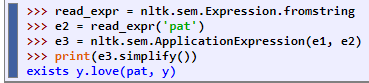

Clearly something is missing here, namely a declaration of the value of e1. In order for ApplicationExpression(e1, e2) to be β-convertible to exists y.love(pat, y), e1 must be a λ-abstract which can take pat as an argument. Your task is to construct such an abstract, bind it to e1, and satisfy yourself that the statements above are all satisfied (up to alphabetic variance). In addition, provide an informal English translation of e3.simplify().

Now carry on doing this same task for the further cases of e3.simplify() shown below.

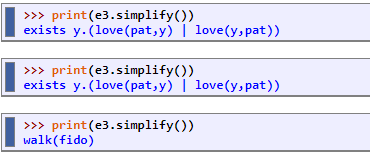

In [19]:
read_expr = nltk.Expression.fromstring

In [35]:
def check_abstract(expr1, expr2='pat'):
    e1, e2 = read_expr(expr1), read_expr(expr2)
    e3 = nltk.sem.ApplicationExpression(e1, e2)
    print(e3.simplify())

In [36]:
# Pat loves someone
check_abstract(r"\x. exists y. love(x, y)")

exists y.love(pat,y)


In [37]:
# There is someone who loves Pat or is loved by Pat
check_abstract(r"\x. exist y. (love(x, y) | love(y, x))")

exists y.(love(pat,y) | love(y,pat))


In [38]:
# Fido walks
check_abstract(r"\x. walk(fido)")

walk(fido)


# Exercise 6

As in the preceding exercise, find a λ abstract e1 that yields results equivalent to those shown below.

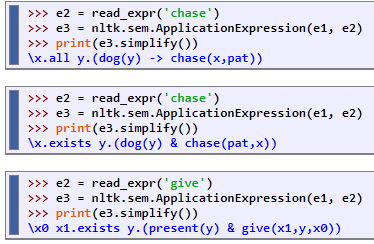

In [39]:
check_abstract(r"\P. \x. all y. (dog(y) -> P(x, pat))", "chase")

\x.all y.(dog(y) -> chase(x,pat))


In [40]:
check_abstract(r"\P. \x. exists y. (dog(y) & P(pat, x))", "chase")

\x.exists y.(dog(y) & chase(pat,x))


In [41]:
check_abstract(r"\P. \x0. \x1. exists y. (present(y) & P(x1, y, x0))", "give")

\x0 x1.exists y.(present(y) & give(x1,y,x0))


# Exercise 7

As in the preceding exercise, find a λ abstract e1 that yields results equivalent to those shown below.

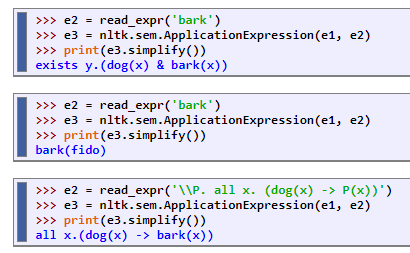

In [42]:
check_abstract(r"\P. exists y. (dog(x) & P(x))", "bark")

exists y.(dog(x) & bark(x))


In [43]:
check_abstract(r"\P.P(fido)", "bark")

bark(fido)


In [46]:
check_abstract(expr1=r"\P. P(bark)", 
               expr2=r"\P. all x. (dog(x) -> P(x))")

all x.(dog(x) -> bark(x))


# Exercise 8

Develop a method for translating English sentences into formulas with binary **generalized quantifiers**. In such an approach, given a generalized quantifier Q, a quantified formula is of the form Q(A, B), where both A and B are expressions of type 〈e, t〉. Then, for example, all(A, B) is true iff A denotes a subset of what B denotes.

# Exercise 9

Extend the approach in the preceding exercise so that the truth conditions for quantifiers like *most* and *exactly three* can be computed in a model.

# Exercise 10

Modify the sem.evaluate code so that it will give a helpful error message if an expression is not in the domain of a model's valuation function.

# Exercise 11

Select three or four contiguous sentences from a book for children. A possible source of examples are the collections of stories in nltk.corpus.gutenberg: bryant-stories.txt, burgess-busterbrown.txt and edgeworth-parents.txt. Develop a grammar which will allow your sentences to be translated into first order logic, and build a model which will allow those translations to be checked for truth or falsity.

# Exercise 12

Carry out the preceding exercise, but use DRT as the meaning representation.

# Exercise 13

Taking (Warren & Pereira, 1982) as a starting point, develop a technique for converting a natural language query into a form that can be evaluated more efficiently in a model. For example, given a query of the form (P(x) & Q(x)), convert it to (Q(x) & P(x)) if the extension of Q is smaller than the extension of P.